# Online News Popularity Project
### A Prediction Study
#### By: Mayra Weidner

## Project Topic


The transition of news from print, television, and radio to digital spaces has caused significant disruptions in the traditional news industry. Online platforms such as Buzzfeed, Mashable, and Medium publish a multitude of articles daily. To remain relevant, these platforms strive to publish articles that will attract more visitors and encourage widespread sharing.

In this study, I will analyze the Mashable dataset, which comprises data for nearly 40,000 articles. The project involves utilizing regression analysis to predict the number of times articles can be shared. This regression-based approach will prove invaluable to Mashable as it enables them to make informed decisions about which articles to publish, predicting those that are most likely to receive the maximum number of shares.

**Goals**
1. Predict the number of shares an article is likely to receive
2. Understand which predictors affect the outcome (may reduce number of attributes if deemed unnecessary)
3. Assess the quality of predictions

## Data Source and Description

This project uses the Online News Popularity dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/332/online+news+popularity).

**Citation:**  
K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision
Support System for Predicting the Popularity of Online News. Proceedings
of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,
September, Coimbra, Portugal.

The dataset contains a collection of statistics from articles that were published by [Mashable](https://mashable.com). This dataset does not share the original content but some statistics associated with it. The original content can be publicly accessed and retrieved using the provided urls.

The dataset is a 24.31 MB csv file containing 39,644 instances with 61 attributes (58 predictive attributes, 2 non-predictive, and 1 goal field). Given that there are 61 attributes, I included detailed attribute [descriptions](Data/OnlineNewsPopularity.names) in my repo and an excerpt below.

0. url:                           URL of the article (non-predictive)
1. timedelta:                     Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title:                Number of words in the title
3. n_tokens_content:              Number of words in the content
4. n_unique_tokens:               Rate of unique words in the content
5. n_non_stop_words:              Rate of non-stop words in the content
6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
7. num_hrefs:                     Number of links
8. num_self_hrefs:                Number of links to other articles published by Mashable
9. num_imgs:                      Number of images
10. num_videos:                   Number of videos  
...
60. shares:                       Number of shares (target)

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('Data/OnlineNewsPopularity.csv')

In [3]:
# preview data
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# data types for each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

59 out of 61 attributes in this dataset are continuous numbers, 1 attribute is a discrete number, and 1 attribute is an object.

## Data Cleaning and Exploratory Data Analysis

### Data Cleaning

In [5]:
# remove leading spaces from attribute names
# this clean up will make it easier to write code with column names
df.columns = df.columns.str.strip()
#df.head()

In [6]:
# check for null values to determine if attributes need to be dropped or filled in
df.isnull().values.any()

False

The dataset does not have null values.

In [7]:
# check for duplicates to determine if rows need to be deleted to avoid double counting
df.drop_duplicates()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


The dataset does not have duplicate rows.

In [8]:
# drop non-predictive attributes as these attributes will not contribute to analysis
# URL - URL of the article
# timedelta - Days between the article publication and the dataset acquisition

# drop is_weekend as there are separate attributes for Saturday and Sunday (this attribute is redundant)

df.drop(labels=['url', 'timedelta', 'is_weekend'], axis = 1, inplace=True)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Data_channel and weekday_is columns have binary numbers. These attributes make up 13 of 58 remaining columns. By combining these columns and creating labels, I will decrease the amount of attributes I'm dealing with and hopefully make visualization easier. I can add values if I need them later.

In [9]:
# Create a dictionary mapping column names to labels
column_labels = {
    'data_channel_is_lifestyle': 'lifestyle',
    'data_channel_is_entertainment': 'entertainment',
    'data_channel_is_bus': 'bus',
    'data_channel_is_socmed': 'socmed',
    'data_channel_is_tech': 'tech',
    'data_channel_is_world': 'world'
}

# Create a new column for labels based on the channel columns
df['data_channel'] = df[[col for col in column_labels.keys()]].apply(
    lambda row: column_labels[row.idxmax()] if row.max() == 1 else '', axis=1
)

# Drop the original channel columns
df.drop(list(column_labels.keys()), axis=1, inplace=True)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,entertainment
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,bus
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,bus
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,entertainment
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,tech


In [10]:
# Create a dictionary mapping column names to labels
column_labels = {
    'weekday_is_monday': 'monday',
    'weekday_is_tuesday': 'tuesday',
    'weekday_is_wednesday': 'wednesday',
    'weekday_is_thursday': 'thursday',
    'weekday_is_friday': 'friday',
    'weekday_is_saturday': 'saturday',
    'weekday_is_sunday': 'sunday'
}

# Create a new column for labels based on the weekday columns
df['weekday_is'] = df[[col for col in column_labels.keys()]].apply(
    lambda row: column_labels[row.idxmax()] if row.max() == 1 else '', axis=1
)

# Drop the original weekday columns
df.drop(list(column_labels.keys()), axis=1, inplace=True)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday_is
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,entertainment,monday
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,bus,monday
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,bus,monday
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,entertainment,monday
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,tech,monday


In [11]:
# n_tokens_content represents number of words in the content. It's min value is 0.
# This means that there are articles with no content.
# I'll remove these rows as it adds nothing to the analysis.

# find number of rows that contain 0 for n_tokens_content
num_no_content = df[df['n_tokens_content'] == 0].index
print('Number of articles with no content', num_no_content.size)

Number of articles with no content 1181


In [12]:
# delete rows with n_tokens_content = 0
df = df[df['n_tokens_content'] != 0]
print("Dataframe row count decreased from 39,644 to", len(df. index))

Dataframe row count decreased from 39,644 to 38463


**Data cleaning summary:**
* Removed leading spaces from attribute names
* Checked for null and duplicate values - values are unique and non-null
* Dropped 2 nonpredictive values and is_weekend attributes as these are unneccessary
* Reduced the number of attributes from 61 to 47 by combining like columns with binary numbers and changing the values to labels
* Removed articles with no content - reduced row count from 39,644 to 38,463

### Exploratory Data Analysis

In [13]:
# basic statistical descriptions of the data
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,10.382419,563.295375,0.565049,1.027065,0.710336,11.217872,3.394769,4.563061,1.263786,4.687892,...,0.098376,0.779963,-0.267493,-0.537970,-0.110801,0.280573,0.070997,0.342431,0.154930,3355.360398
std,2.113800,468.299538,3.573022,5.307978,3.312293,11.340580,3.869773,8.295365,4.164896,0.283231,...,0.070382,0.212509,0.121174,0.279703,0.094919,0.323561,0.264338,0.188606,0.225636,11585.968776
min,2.000000,18.000000,0.114964,1.000000,0.119134,0.000000,0.000000,0.000000,0.000000,3.600000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,0.477419,1.000000,0.632588,5.000000,1.000000,1.000000,0.000000,4.496250,...,0.050000,0.600000,-0.331532,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,423.000000,0.542986,1.000000,0.693727,8.000000,3.000000,1.000000,0.000000,4.674121,...,0.100000,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,0.611111,1.000000,0.756944,14.000000,4.000000,4.000000,1.000000,4.861901,...,0.100000,1.000000,-0.193415,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


#### Numeric Factors

In [14]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'da

In [15]:
numeric_cols = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
                'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
                'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
                'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
                'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                'self_reference_min_shares', 'self_reference_max_shares',
                'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
                'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
                'global_rate_positive_words', 'global_rate_negative_words',
                'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
                'min_positive_polarity', 'max_positive_polarity',
                'avg_negative_polarity', 'min_negative_polarity',
                'max_negative_polarity', 'title_subjectivity',
                'title_sentiment_polarity', 'abs_title_subjectivity',
                'abs_title_sentiment_polarity', 'shares']

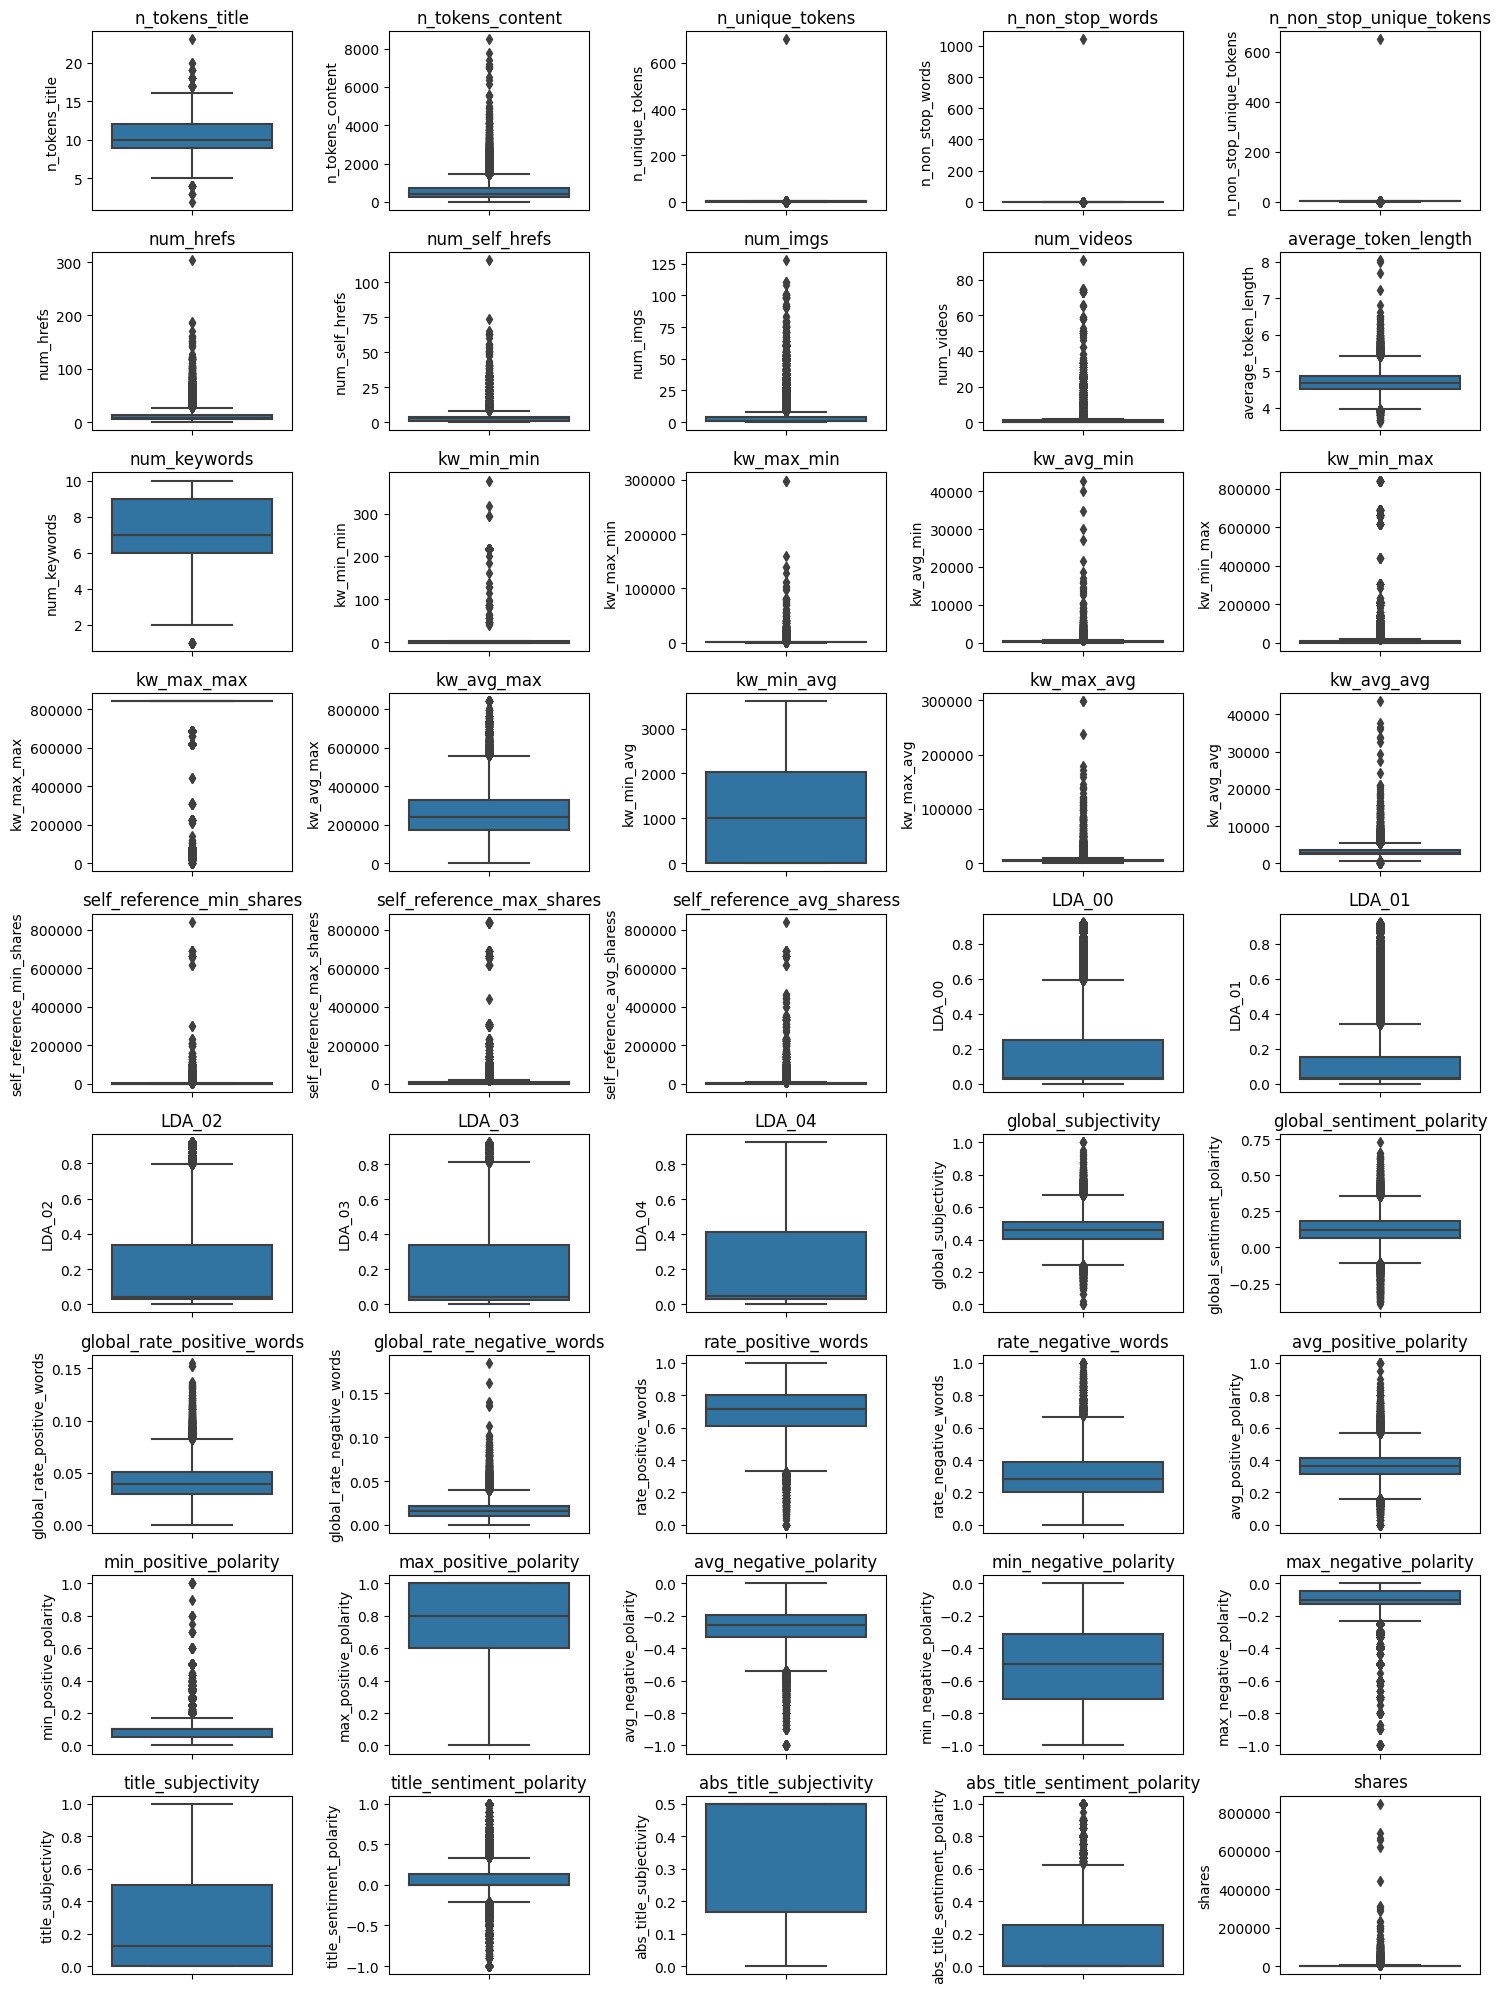

In [16]:
# Determine the number of columns and rows for subplots
num_cols = 5  
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric columns and create boxplots
for i, col in enumerate(numeric_cols):
    ax = axes[i] if i < len(numeric_cols) else None  # Handle the case when there are fewer columns than subplots
    # Create the boxplot using seaborn
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(col)

# Adjust the spacing between subplots
fig.tight_layout()

In [17]:
# histogram plotting function with KDE overlay 
# plot mean as a red line 
def generate_histograms(df, numeric_cols):
    for col in numeric_cols:
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(col, fontsize=18)
        plt.xlabel(col, fontsize=16)
        plt.ylabel('Frequency', fontsize=16)
        mean = df[col].mean()
        plt.axvline(mean, color='red')
        plt.show()

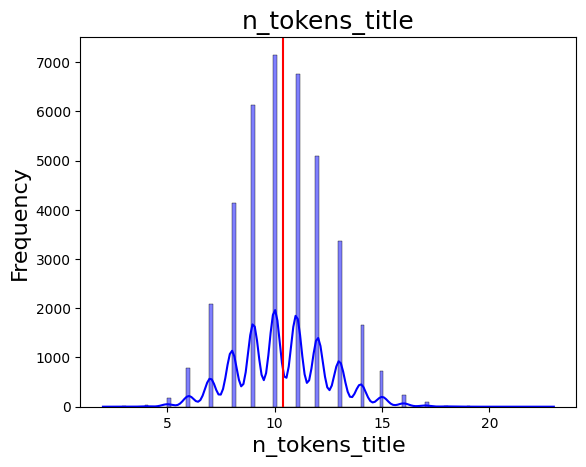

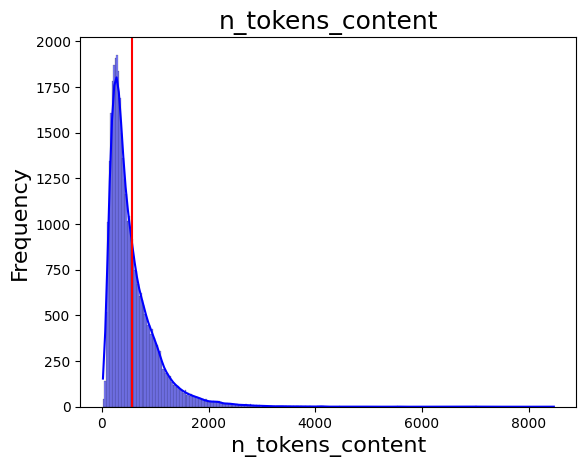

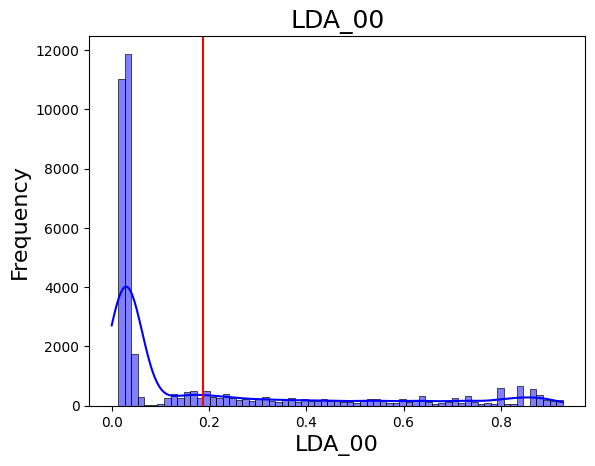

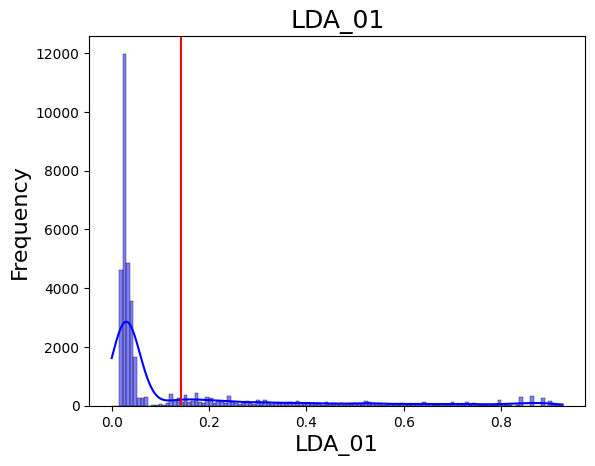

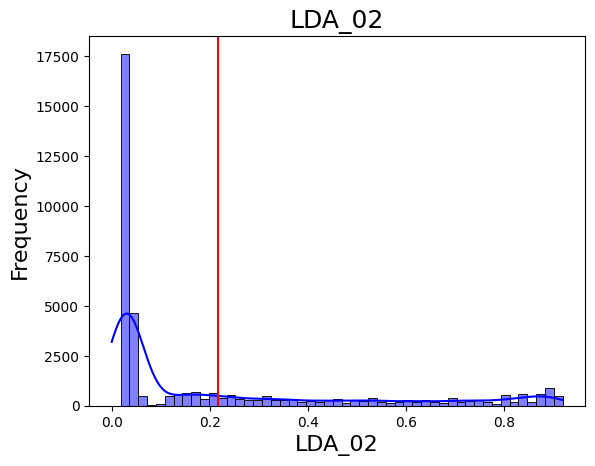

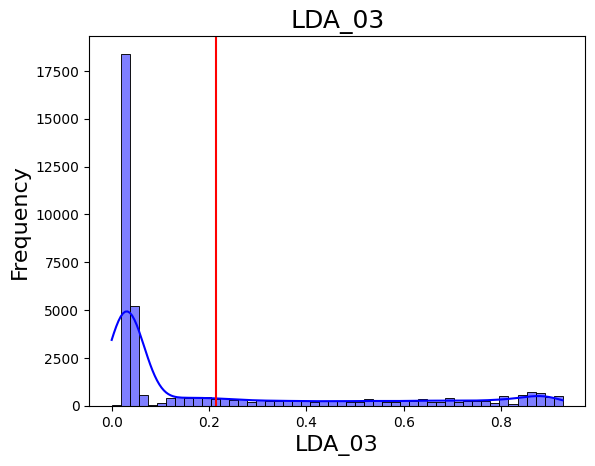

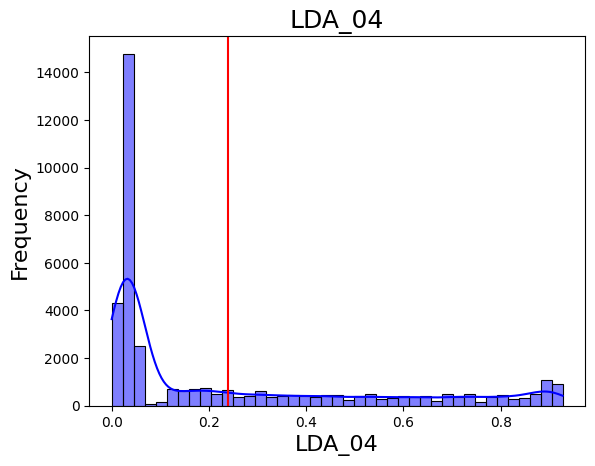

In [18]:
# due to kernel constraints, I selected a sub sample of numeric fields to plot
sub_numeric_cols = ['n_tokens_title', 'n_tokens_content', 'LDA_00', 'LDA_01', 'LDA_02','LDA_03', 'LDA_04']
generate_histograms(df, sub_numeric_cols)

Latent Dirichlet Allocation (LDA) Background:   
LDA assumes that each document in the dataset is a mixture of a small number of topics, and each word's presence in a document is attributable to one of those topics. The LDA analysis identifies the five most relevant topics present in the dataset. LDA_00, LDA_01, LDA_02, LDA_03, and LDA_04, measures the closeness of each article to these identified topics.

https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2

Observations:  
The "n_tokens_title" attribute exhibited a balanced distribution of word counts in the article titles, with a relatively equal spread of values on both sides of the mean. This symmetric distribution suggests that the article titles contain a moderate number of words. 

The "n_tokens_content" field displayed a right-skewed distribution, indicating that a majority of the articles had a smaller number of words in their content. This skewness suggests that most articles in the dataset are shorter in length which is what was expected given the rate at which people consume digital media.

The LDA topics also exhibited right-skewed distributions which suggests weaker associations of articles with the identified topic. As shown in the boxplots, outliers were present in the LDA data which is likely driving the skewness from the mean as the mean is not robust and more susceptible to change due to noise. I'll figure out how to deal with these outliers as my project progresses.

In summary, the analysis revealed that articles in the dataset tend to have moderate word counts in titles and shorter content lengths. Many articles showed weaker associations with the identified LDA topics, but outliers are present and should be addressed if attribute is used in the model.

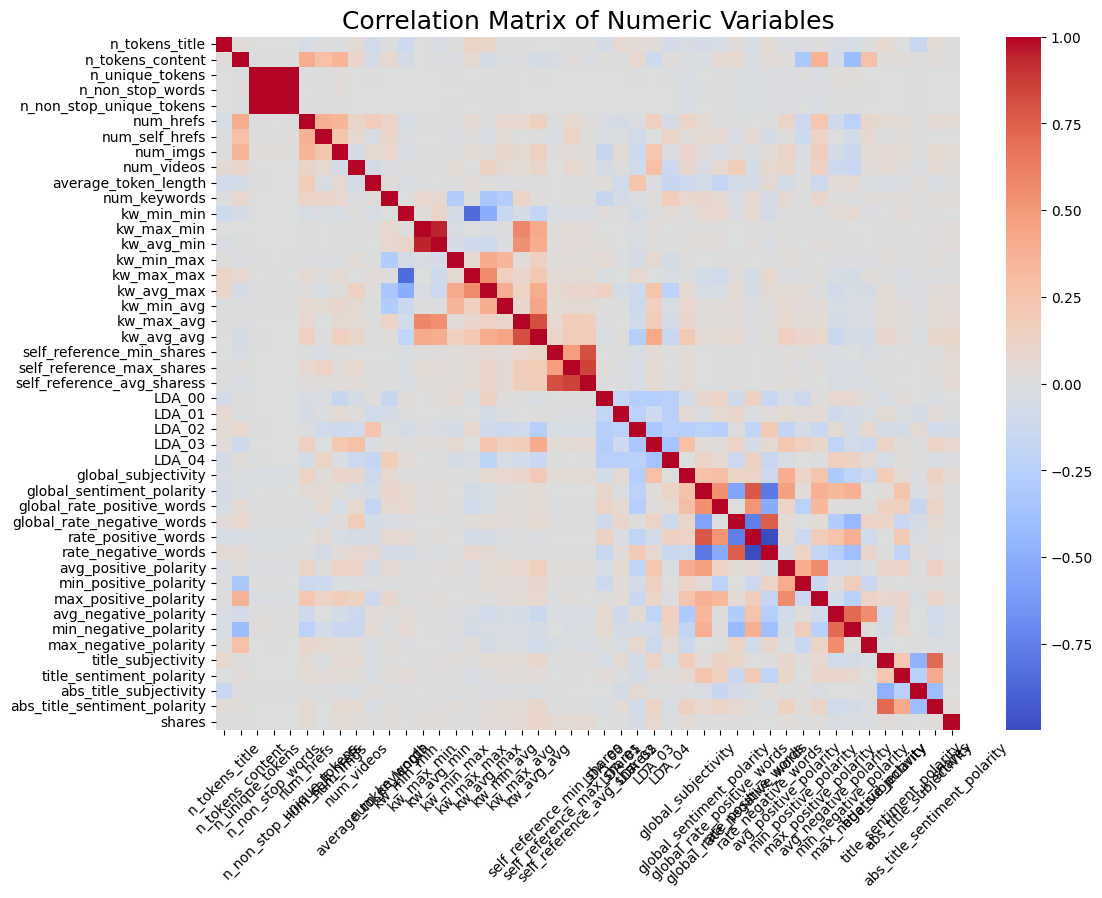

In [19]:
# Calculate the correlation matrix
correlation = df[numeric_cols].corr()

# Create a figure and axis with a larger size
fig, ax = plt.subplots(figsize=(12, 9))

# Create the heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, ax=ax, cmap="coolwarm")

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Set the title and labels
ax.set_title("Correlation Matrix of Numeric Variables", fontsize=18);

Observations:  
The strong correlation (1.0) between "n_unique_tokens," "n_non_stop_words," and "n_non_stop_unique_tokens" suggests that these attributes are linearly dependent. Articles with a higher rate of unique words also tend to have a higher rate of non-stop words and unique non-stop words which means that there is similarity in the information provided by these attributes.

Furthermore, there is a strong correlation between "kw_avg_min" and "kw_max_min" which indicates that there is a linear relationship in the performance of keywords. Articles with a low minimum share for the worst keyword also tend to have a low maximum share for the worst keyword. This correlation implies that these attributes may provide redundant information about keyword performance. 

Upon researching the significance of strongly correlated attributes in predictive models, I learned that strongly correlated features can be redundant in a predictive model. Excluding one of the strongly correlated features is unlikely to significantly impact the model's performance, and it can even be beneficial by preventing overfitting and simplifying the model. Removing redundant features also helps reduce the dimensionality of the dataset.  

Reference: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [20]:
df.drop(['n_non_stop_words','n_unique_tokens','kw_avg_min','kw_avg_avg'],axis=1)

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday_is
0,12.0,219.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,entertainment,monday
1,9.0,255.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,bus,monday
2,9.0,211.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,bus,monday
3,9.0,531.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,entertainment,monday
4,13.0,1072.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,tech,monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,-1.0,...,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,tech,wednesday
39640,12.0,328.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,-1.0,...,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,socmed,wednesday
39641,10.0,442.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,-1.0,...,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,,wednesday
39642,6.0,682.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,-1.0,...,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,world,wednesday


#### Categorical Factors

In [21]:
# barplot function  
def bar_plot(x, df):
    count = df[x].value_counts()
    sns.barplot(x=count.index, y=count.values, alpha=0.8)
    plt.title(x, fontsize=18)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Number of Occurrences', fontsize=16)
    plt.show();

In [22]:
categorical_cols = ['data_channel', 'weekday_is']

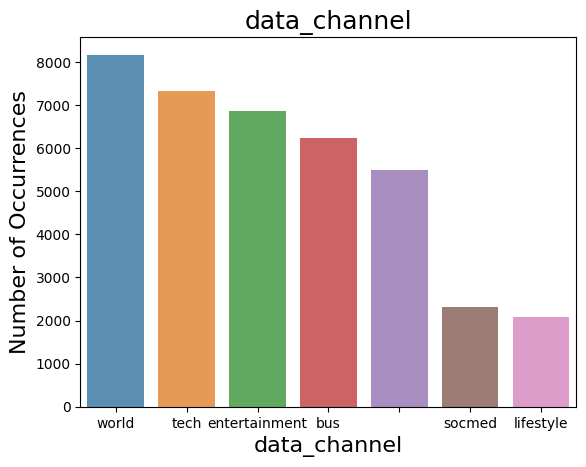

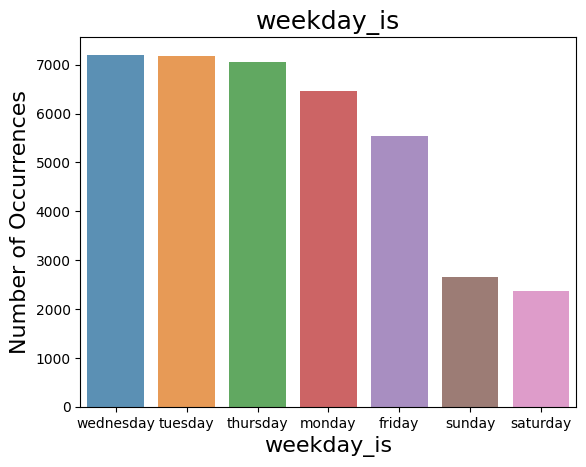

In [23]:
for col in categorical_cols:
    bar_plot(col, df)

**Note - I'll continue working the categorical factor section and wrap up EDA in part 2. The work presented above covers the expectations outlined in part 1. I worked ahead a bit to get a headstart on part 2.**